In [4]:
import pandas as pd
import numpy as np


In [213]:
data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

In [203]:
matriz = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/matriz.csv',sep='|')

In [134]:
matriz = matriz.loc[(matriz.localidad.str.contains('capital'))]

In [214]:
data_= data

In [215]:
data_ = data_[data_.localidad.str.contains('capital')]

AttributeError: 'DataFrame' object has no attribute 'localidad'

In [262]:
data_ = data_[data_.superficie_total<4000]

In [206]:
data_ = data_[data_.propiedad.str.contains('apartment')]

In [212]:
data_.iloc[454]

Unnamed: 0                              7
id                                      7
tipo                                 sell
propiedad                       apartment
id_localizacion               3.43608e+06
pais                            argentina
localidad                 capital federal
barrio                           belgrano
barrio_2b                             NaN
latitud                          -34.5599
longitud                         -58.4434
moneda                                usd
ambientes                               1
ambientes_ceros                         1
nuevos_ambientes                        1
superficie_total                       45
superficie_cubierta_m2                 40
precio_aprox_usd                   138000
precio_m2                         3066.67
Name: 7, dtype: object

In [202]:
def outliers(p_data):


    data_modificada = p_data

    # GENERO CULUMNA DE MEDIAS AGRUPANDO POR PCIA, BARRIO, TIPO DE PROPIEDAD
    data_modificada ['media_supTotal'] = data_modificada.groupby(['localidad','barrio','propiedad'])['superficie_total'].transform('mean')
    data_modificada ['media_supCubierta'] = data_modificada.groupby(['localidad','barrio','propiedad'])['superficie_cubierta_m2'].transform('mean')
    data_modificada ['media_PrecioM2'] = data_modificada.groupby(['localidad','barrio','propiedad'])['precio_m2'].transform('mean')
    data_modificada ['media_PrecioAproxUSD'] = data_modificada.groupby(['localidad','barrio','propiedad'])['precio_aprox_usd'].transform('mean')


    #GENERO COLUMNA DE STD AGRUPANDO POR PCIA, BARRIO, TIPO DE PROPIEDAD
    data_modificada ['std_supTotal'] = data_modificada.groupby(['localidad','barrio','propiedad'])['superficie_total'].transform('std')
    data_modificada ['std_supCubierta'] = data_modificada.groupby(['localidad','barrio','propiedad'])['superficie_cubierta_m2'].transform('std')
    data_modificada ['std_PrecioM2'] = data_modificada.groupby(['localidad','barrio','propiedad'])['precio_m2'].transform('std')
    data_modificada ['std_PrecioAproxUSD'] = data_modificada.groupby(['localidad','barrio','propiedad'])['precio_aprox_usd'].transform('std')


    #GENERO COLUMNA CON LA FORMULA DE CHEUVENET PARA EL CALCULO DE OUTLIERS
    data_modificada ['supTotal_criterio_cheuvenet'] = (abs(data_modificada.superficie_total-data_modificada.media_supTotal))/(data_modificada.std_supTotal)
    data_modificada ['supCubierta_criterio_cheuvenet'] = (abs(data_modificada.superficie_cubierta_m2-data_modificada.media_supCubierta))/(data_modificada.std_supCubierta)
    data_modificada ['priceM2_criterio_cheuvenet'] = (abs(data_modificada.precio_m2-data_modificada.media_PrecioM2))/(data_modificada.std_PrecioM2)
    data_modificada ['priceAprox_criterio_cheuvenet'] = (abs(data_modificada.precio_aprox_usd-data_modificada.media_PrecioAproxUSD))/(data_modificada.std_PrecioAproxUSD)

    
    
    #  % OUTLIERS SUPERFICIES TOTALES
    data_modificada.loc[data_modificada.supTotal_criterio_cheuvenet>2].shape[0]/data_modificada.shape[0]    
    data_modificada.superficie_total.loc[data_modificada.supTotal_criterio_cheuvenet>2] = np.nan
    
    
    #  % OUTLIERS SUPERFICIES CUBIERTAS
    data_modificada.loc[data_modificada.supCubierta_criterio_cheuvenet>2].shape[0]/data_modificada.shape[0] 
    data_modificada.superficie_cubierta_m2.loc[data_modificada.supCubierta_criterio_cheuvenet>2] = np.nan
    
    
    #  % OUTLIERS DE PRECIOS APROX USD
    data_modificada.precio_aprox_usd.loc[data_modificada.priceAprox_criterio_cheuvenet>2].shape[0]/data_modificada.shape[0]   
    data_modificada.precio_aprox_usd.loc[data_modificada.priceAprox_criterio_cheuvenet>2] = np.nan
    
    #  % OUTLIERS DE PRECIOS POR M2
    data_modificada.loc[data_modificada.priceM2_criterio_cheuvenet>2].shape[0]/data_modificada.shape[0]
    data_modificada.precio_m2.loc[data_modificada.priceM2_criterio_cheuvenet>2] = np.nan
    
    
    
    return data_modificada 

In [179]:
data_ = outliers(data_)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [180]:
#GENERO AMBIENTES DE MATRIZ
#data_['ambientes']=data_.merge(matriz,how='left', left_index=True, right_index=True)['ambientes']

#GENERO DUMMYS DE AMBIENTES
data_['1_AMBIENTE'] = (data_.ambientes>=1)&(data_.ambientes<2)
data_['2_AMBIENTE'] = (data_.ambientes>=2)&(data_.ambientes<3)
data_['3_AMBIENTE'] = (data_.ambientes>=3)&(data_.ambientes<4)
data_['4_AMBIENTE'] = (data_.ambientes>=4)&(data_.ambientes<5)
data_['5_AMBIENTE'] = (data_.ambientes>=5)&(data_.ambientes<6)
data_['6_AMBIENTE'] = (data_.ambientes>=6)&(data_.ambientes<7)
data_['7_AMBIENTE'] = (data_.ambientes>=7)&(data_.ambientes<8)


data_[['1_AMBIENTE','2_AMBIENTE','3_AMBIENTE','4_AMBIENTE', '5_AMBIENTE','6_AMBIENTE','7_AMBIENTE']] = data_[['1_AMBIENTE','2_AMBIENTE','3_AMBIENTE','4_AMBIENTE', '5_AMBIENTE','6_AMBIENTE','7_AMBIENTE']].applymap(lambda x : 1 if (x) else 0)


#GENERO DUMMYS TIPO DE PROPIEDAD 
data_['CASA'] = data_.propiedad.str.contains('house')
data_['PH'] =  data_.propiedad.str.contains('PH')
data_['DTO'] = data_.propiedad.str.contains('apartment')
data_[['CASA','PH','DTO']] = data_[['CASA','PH','DTO']].applymap(lambda x : 1 if x else 0)


#ELIMINO REGISTROS NULOS DE VARIABLES A UTILIZAR EN EL MODELO
data_=data_[data_.precio_m2.notnull()]
data_=data_[data_.superficie_total.notnull()]
data_=data_[data_.ambientes.notnull()]


#GENERO DUMMYS DE BARRIOS

#QUITO NULOS DE LA COLUMNA STATE_NAME
data_ = data_[data_.barrio.notnull()]


#CREO LISTA DE BARRIOS 
barrios = data_[data_.localidad.str.contains('capital')].barrio.unique()


#GENERO DUMMYS
for barrio in barrios:
    indices_barrios = (data_.index[data_.barrio.str.contains(barrio)])
    barrio = barrio.lower().replace(' ','_')
    df = data_
    df.barrio = df.barrio.apply(lambda x : x.lower().replace(' ','_'))
    df[barrio] = df.barrio.str.contains(barrio)



numero_barrios = len(data_.barrio[data_.localidad.str.contains('capital')].unique())
indices_dummys_barrios = data_.shape[1]-numero_barrios

#CREO EL DATAFRAME CON LAS DUMMYS DE BARRIOS
dummys_barrios = data_.iloc[:,indices_dummys_barrios:]


dummys_barrios = dummys_barrios.applymap(lambda x : 1 if (x) else 0)


#GENERO DUMMYS DE BARRIOS EN EL DATAFRAME
data_.iloc[:,indices_dummys_barrios:] = dummys_barrios


In [401]:
data_ = data_[data_.localidad.str.contains('capital')]

In [155]:
data_.shape

(12347, 100)

In [3]:
xs

NameError: name 'xs' is not defined

In [181]:
x_feactures = data_.iloc[:,31:]

(12869, 102)

In [182]:
df1 = data_['superficie_total']

In [183]:
xs = pd.concat([df1,x_feactures],axis=1)

In [148]:
#SKLEARN

#GENERO VARIABLES INDEPENDIENTES
x_feactures = data_.iloc[:,38:][(data_.superficie_total<50)&(data_.precio_m2<35000)]
df1 = data_['superficie_total'][(data_.superficie_total<50)&(data_.precio_m2<35000)]
xs = pd.concat([df1,x_feactures],axis=1)


In [184]:

#GENERO VARIABLE DEPENDIENTE
y = data_.precio_m2

In [153]:
y.shape

(12347,)

In [185]:
#TRANSFORMO VARIABLES INDEPENDIENTES EN FORMATO MATRIZ
xs = xs.as_matrix()


#TRANSFORMO VARIABLE DEPENDIENTE EN FORMATO MATRIZ
y = y.as_matrix()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [186]:
#IMPORTAR LIBRERIAS DE SKLEARN
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [187]:
#PARTICIONAR DATOS DE ENTRENAMIENTO Y TESTING
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.4)

In [192]:
x_test.shape

(1317, 64)

In [193]:
modelo = linear_model.LinearRegression()

In [194]:
#FIT 
modelo.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
#PREDECIR DATOS "Y" DE "X" TEST 
y_predict = modelo.predict(x_test)

In [196]:
#PENDIENTES
pendientes = modelo.coef_

In [197]:
pendientes

array([ 8.53176472e-02,  1.08005237e+01, -8.84578186e+00, -3.01888677e+01,
        2.59121567e+00, -5.65426207e+01, -1.43813267e+02,  2.25998798e+02,
        1.07434062e-11, -1.36424205e-11, -1.45519152e-11,  3.66739500e+02,
        5.80067828e+02, -2.81976467e+02, -4.95153714e+02,  4.27502919e+02,
        4.02220686e+02,  3.13193616e+03, -2.55075317e+02, -2.32377583e+02,
       -7.66903695e+02, -1.01923491e+03,  1.64679810e+02, -7.53306932e+02,
       -6.64612541e+01, -5.82780799e+02, -8.18711226e+02, -1.29957947e+03,
       -4.68854894e+02, -6.95020179e+02,  3.80841850e+01, -1.77925828e+02,
       -6.85367895e+02, -5.79801755e+02, -6.47465184e+02, -6.66128771e+01,
        2.26217609e+01, -2.86936259e+02,  6.65398614e+02, -2.19555804e+02,
        1.05561380e+03, -5.67937521e+02, -7.38124696e+02, -1.02419019e+02,
       -4.55720079e+02, -7.90609306e+02, -4.85155494e+02, -2.70676948e+02,
       -4.10265468e+02, -8.54097557e+02, -8.29716434e+02, -5.27010760e+02,
        7.77637809e+03,  

In [198]:
#ORDENADA 
ordenada = modelo.intercept_

In [199]:
ordenada

2765.4967252536476

In [200]:
#R2
print(modelo.score(x_train,y_train))

0.9636373893584926


In [424]:
#FIT 
modelo.fit(x_train,y_train)
#PREDECIR DATOS "Y" DE "X" TEST 
y_predict = modelo.predict(x_test)
#PENDIENTES
pendientes = modelo.coef_
#ORDENADA 
ordenada = modelo.intercept_
#R2
print(modelo.score(x_train,y_train))

0.5116295530456167


In [425]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(modelo, x_train, y_train, cv= 4)
print(scores.mean())

0.5075680227924261


In [384]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype(int), y_predict.astype(int))

0.0019164430816404753

In [350]:
    df = pd.DataFrame({'1':pd.Series(y_test),'2':pd.Series(y_predict)})

In [279]:
x_test[:,0]

array([ 50.,  24.,  62., ..., 116.,  60., 116.])

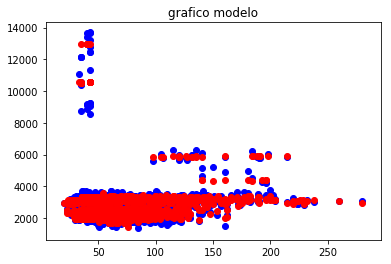

In [201]:
import matplotlib.pyplot as plt

#GENERO EJE X -> SUPERFICIE TOTAL
x1 = x_test[:,0]

#GENERO EJE Y -> PRECIO M2 DE TEST
x2 = y_test

# EJE Y -> PRECIO M2 PREDICHO
x3 = y_predict


#PLOT
plt.scatter(x1,x2,label='test modelo', color='blue')
plt.scatter(x1,x3,label='prediccion modelo', color='red')
plt.title('grafico modelo')
plt.show()

In [216]:
%pwd

'/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb'

In [70]:
import Util as utilidades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode as uni
import Util as utilidades
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

In [4]:
data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

In [5]:
#QUITO LAS FILAS REPETIDAS DEL CAMPO DESCRIPCION
data = data.drop_duplicates(subset=['description'], keep='first')

In [6]:
#QUITO LAS FILAS CON SUPERFICIE CUBIERTA MENOR A 16
data = data[(data.surface_covered_in_m2>16)|(data.surface_covered_in_m2.isnull())]
  

In [7]:
#QUITO LAS FILAS CON SUPERFICIE TOTAL MENOR A 16
data = data[(data.surface_total_in_m2>16)|(data.surface_total_in_m2.isnull())]


In [8]:
#QUITO LAS FILAS CON SUPERFICIES CUBIERTAS MENOR 50 DE CASAS 
data = data[(~((data.surface_covered_in_m2<50)&(data.property_type.str.contains('house'))))]


In [9]:
#QUITO LAS FILAS CON SUPERFICIE TOTAL MENOR 50 DE CASAS 
data = data[(~((data.surface_total_in_m2<50)&(data.property_type.str.contains('house'))))]


In [11]:
#PONGO NULOS LOS VALORES DE SUPERFICIE CUBIERTA CUANDO SUPERFICIE_CUBIERTA>SUPERFICIE_TOTAL
data.surface_covered_in_m2[data.surface_covered_in_m2>data.surface_total_in_m2] = np.nan 


In [12]:
##REEMPLAZO COLUMNAS DESCRIPCION Y TITULO (MINUSCULAS Y ACENTOS)
data.description = data.description.astype(str).apply(uni.unidecode).str.lower()
data.title = data.title.astype(str).apply(uni.unidecode).str.lower()


In [13]:
##OBTENGOS JARDINES, TERRAZAS 
booleanos_jardines =(data.description.str.contains('parquizado'))|(data.description.str.contains('patio'))|(data.description.str.contains('jardin')) 
booleanos_terraza = (data.description.str.contains('terraza'))|(data.description.str.contains('quincho')) 
    

In [14]:
##CALCULO SUPERFICIES DE JARDINES (SIN TERRAZA) 

serie_jardines = (booleanos_jardines) & (~booleanos_terraza) & (data.surface_covered_in_m2.notnull()) & (data.surface_total_in_m2.notnull())
data['superficie_jardin_patio'] = data.surface_total_in_m2[serie_jardines]-data.surface_covered_in_m2[serie_jardines]
serie_superficie_jardines = pd.DataFrame(data.superficie_jardin_patio[(data.superficie_jardin_patio.notnull()) & (data.superficie_jardin_patio > 0)])
data['superficies_jardines'] = data.merge(serie_superficie_jardines,how='left',left_on=['Unnamed: 0'],right_index=True)['superficie_jardin_patio_y']


In [15]:
##CALCULO SUPERFICIES DE TERRAZAS (SIN JARDINES)
serie_terraza = (booleanos_terraza) & (~booleanos_jardines) & (data.surface_covered_in_m2.notnull()) & (data.surface_total_in_m2.notnull())
superficie_terraza_indices = pd.DataFrame(data.surface_total_in_m2[serie_terraza]-data.surface_covered_in_m2[serie_terraza],columns=['terraza_y'])    
columna_superficie_terraza = data.merge(superficie_terraza_indices[superficie_terraza_indices.terraza_y>0],how='left', left_on=['Unnamed: 0'],right_index=True)['terraza_y']
data['superficie_terraza'] = columna_superficie_terraza
    

In [17]:
##CALCULO SUPERFICIES DE TERRAZAS CON JARDINES
serie_terraza_jardin = (booleanos_terraza) & (booleanos_jardines) & (data.surface_covered_in_m2.notnull()) & (data.surface_total_in_m2.notnull())
superficie_terraza_jardin_indices = pd.DataFrame(data.surface_total_in_m2[serie_terraza_jardin]-data.surface_covered_in_m2[serie_terraza_jardin],columns=['terraza_jardin_y'])
columna_superficie_terraza_jardin = data.merge(superficie_terraza_jardin_indices[superficie_terraza_jardin_indices.terraza_jardin_y>0],how='left', left_on=['Unnamed: 0'], right_index=True)['terraza_jardin_y']
data['superficie_terraza_jardin'] = columna_superficie_terraza_jardin



In [18]:
##CONTIENE AMBIENTES EN CAMPO DESCRIPCION 
un_ambiente = data[data.rooms<=7].description.str.contains("ambiente ") | data.description.str.contains("amb.","amb ") & data.description.str.contains("1 amb")
dos_o_mas_ambientes = data.description.str.contains("ambientes") | data.description.str.contains("2 amb")
data["un_ambiente"]=un_ambiente

In [20]:
cant_ambientes_old_desc = data[data.rooms<=7].description.astype(str).apply(utilidades.obtengo_ambiente)
cant_ambientes_old_title = data[data.rooms<=7].title.astype(str).apply(utilidades.obtengo_ambiente)
cant_ambientes_desc = cant_ambientes_old_desc.str.extract(r'(\d+)')
cant_ambientes_title = cant_ambientes_old_title.str.extract(r'(\d+)')

In [21]:
data['cantidad_ambientes_desc'] = cant_ambientes_desc
data['cantidad_ambientes_title'] = cant_ambientes_title

In [22]:
data['un_ambiente'] = data.un_ambiente
data['monoambiente'] = data[data.rooms<=7].description.str.contains('monoambiente') | data.description.str.contains('mono ambiente') | data.title.str.contains('monoambiente') | data.title.str.contains('mono ambiente')  


In [26]:
    data['ambientes'] = data.rooms[data.rooms.fillna(100).astype(int)<6].astype(int)


In [38]:
#data.cantidad_ambientes_title.update(data.cantidad_ambientes_desc)
data.ambientes.update(data.cantidad_ambientes_title)
data.ambientes.update(data.cantidad_ambientes_desc)

In [39]:
    data['var_un_ambiente'] = var_un_ambiente
    data['var_monoambiente'] = var_monoambiente
    data.var_un_ambiente.update(data.ambientes)
    data.var_monoambiente.update(data.var_un_ambiente)


AttributeError: 'bool' object has no attribute 'lower'

In [42]:
    var_un_ambiente = data.un_ambiente.apply(devolver_un_ambiente)
    var_monoambiente = data.monoambiente.apply(devolver_un_ambiente)

In [43]:
    data['var_un_ambiente'] = var_un_ambiente
    data['var_monoambiente'] = var_monoambiente
    data.var_un_ambiente.update(data.ambientes)
    data.var_monoambiente.update(data.var_un_ambiente)

In [44]:
  data['nuevos_ambientes'] = data.var_monoambiente 

In [45]:
 data['ambientes_ceros'] = data.nuevos_ambientes.fillna(0).astype(int) 
    #data['grupos_ambientes'] = pd.cut(data.ambientes_ceros,[0,4!=0])

In [46]:
    ##GUARDO COLUMNA TITLE
    data['surface_total'] = data.surface_total_in_m2

In [47]:
    data.surface_total_in_m2.update(data.surface_covered_in_m2)
    data['nueva_surface_total_in_m2'] = data.surface_total_in_m2 

In [56]:
def ImputarAmbientes(data, rango=5):

    data['imputar_ambientes'] = np.nan
    
    for i in range(1,rango): 
    
        #GENERAR GRUPOS DE SUPERFICIES
        data['categorias_sup_cubierta_por_m2'] = pd.qcut(data[data.surface_covered_in_m2>10].nueva_surface_total_in_m2,i)
        #CALCULAR MEDIAS CANTIDAD_AMBIENTES 
        dfImputacionesAmbientes = pd.DataFrame(data[data.ambientes_ceros!=0].groupby(['state_name','place_name','categorias_sup_cubierta_por_m2'])['ambientes_ceros'].mean())
        serie_imputaciones_ambientes = data.merge(dfImputacionesAmbientes,how='left',left_on=['state_name','place_name','categorias_sup_cubierta_por_m2'],right_on=['state_name','place_name','categorias_sup_cubierta_por_m2'])['ambientes_ceros_y']   
        data.imputar_ambientes.update(serie_imputaciones_ambientes)
    return data.imputar_ambientes

In [57]:
    ##IMPUTAR AMBIENTES
    data['ambientes_imputados_2'] = ImputarAmbientes(data, 10)


In [66]:
def ImputarSupCubierta(data, rango=5):

    data['imputando_superficies_cubiertas'] = np.nan
    
    for i in range(1,rango): 
    
        #GENERAR GRUPOS DE AMBIENTES EN PESOS
        data['ambientes_imputados_ceros'] = data.ambientes_imputados.fillna(0).astype(float)
        data['categorias_ambientes'] = pd.qcut(data[data.ambientes_imputados_ceros>=1].ambientes_imputados_ceros,i)
        #CALCULAR MEDIAS SUPERFICIES CUBIERTAS
        df_superficies_imput = pd.DataFrame(data[data.ambientes_imputados_ceros>=1].groupby(['state_name','place_name','property_type','categorias_ambientes'])['nueva_surface_total_in_m2'].mean())
        imputar_serie = data.merge(df_superficies_imput,how='left',left_on=['state_name','place_name','property_type','categorias_ambientes'],right_on=['state_name','place_name','property_type','categorias_ambientes'])['nueva_surface_total_in_m2_y']
        data.imputando_superficies_cubiertas.update(imputar_serie)
    return data.imputando_superficies_cubiertas

In [69]:
    #IMPUTAR FALTANTES CANTIDAD_AMBIENTES CON SUPERFICIES CUBIERTAS
    data['superficie_cubierta_imputada'] = np.nan
    imputar_serie = ImputarSupCubierta(data, 10)
    data.superficie_cubierta_imputada.update(imputar_serie)

In [71]:
    data.superficie_cubierta_imputada.update(data.nueva_surface_total_in_m2)
    data.superficie_cubierta_imputada[(data.superficie_cubierta_imputada<50)&(data.property_type.str.contains('house'))] = np.nan
   

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
    ##IMPUTAR SUPERFICIE TERRAZA
    data['superficie_terraza_imputada'] = utilidades.ImputarSupTer(data, 10)
    data.superficie_terraza_imputada.update(data.superficie_terraza)

TypeError: ImputarSupTer() takes from 0 to 1 positional arguments but 2 were given